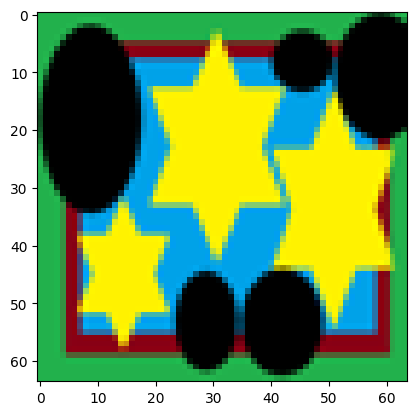

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7087 - loss: 0.9795
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.2997
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.2778
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.2465
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.2493
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.2084
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1828
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1630
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1806
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.1395
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0979
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy:

In [7]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image

# Définir la fonction pour charger et prétraiter l'image
def load_and_preprocess_image(filename):
    img = Image.open(filename).convert('RGB')
    img = img.resize((64, 64))
    img_array = np.array(img) / 255.0
    return img_array

# Charger et afficher l'image
filename = 'data/sample.png'
img_array = load_and_preprocess_image(filename)
plt.imshow(img_array)
plt.show()

# Créer le jeu de données d'entraînement
colors = ['red', 'green', 'blue', 'yellow']
rgb_colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0)]
num_images_per_color = 100

X_train = np.zeros((num_images_per_color * len(colors), 64, 64, 3), dtype=np.float32)
y_train = np.zeros((num_images_per_color * len(colors)), dtype=np.int8)

for i, color in enumerate(colors):
    for j in range(num_images_per_color):
        X_train[i * num_images_per_color + j] = np.full((64, 64, 3), rgb_colors[i], dtype=np.float32)
        y_train[i * num_images_per_color + j] = i

# Créer le modèle TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3), name='flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(6, activation='softmax', name='dense_2')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50)

# Évaluer l'image chargée
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_color = colors[np.argmax(predictions)]

print(f'La couleur dominante dans l\'image est : {predicted_color}')
